<a href="https://colab.research.google.com/github/Emohamed152/DEPI/blob/main/titanic_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True )


In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
df.shape

(891, 9)

check data type

In [8]:
dtypes=df.dtypes
n_unique=df.nunique()
pd.DataFrame({"Dtype":dtypes,"nunique":n_unique})

,Dtype,nunique
Survived,int64,2
Pclass,int64,3
Sex,object,2
Age,float64,88
SibSp,int64,7
Parch,int64,7
Fare,float64,248
Cabin,object,147
Embarked,object,3


convert to catigorical data dype

In [9]:
col=(["Survived","Sex","SibSp","Parch","Embarked"])
df[col]=df[col].astype("category")
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


Handell Null Values
In the 3rd option:
➢ We replace Null Values with Mode if the column is
categorical.
➢ We replace Null Values with Mean if the column is
numerical & normally distributed.
➢ We replace Null Values with Median if the column
numerical & not-normally distributed.

In [10]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2



Drop Null Values in Embarked
Column " very small number"

In [11]:
df=df.dropna(subset=["Embarked"])

Drop Cabin Column
have large larrrrrrrrge num of null

In [12]:
df=df.drop("Cabin",axis=1)

replace null in age with median
"not nurmall dis"

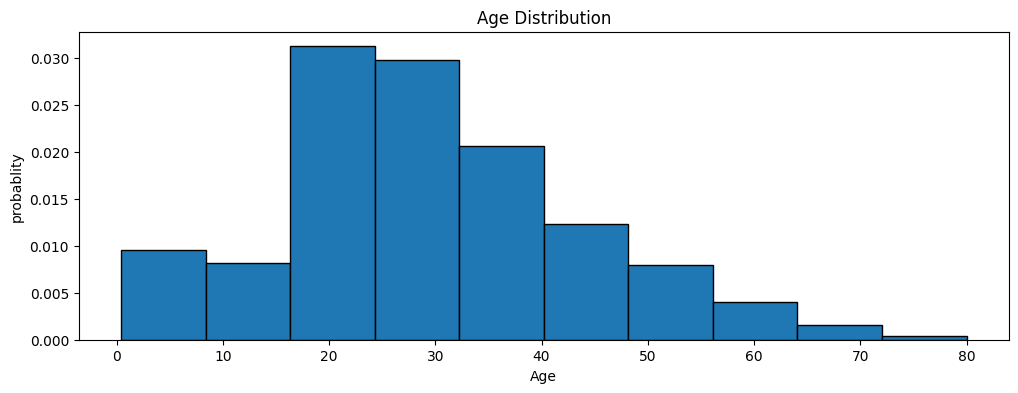

In [13]:
plt.figure(figsize=(12,4))
plt.hist(df["Age"],density=True,edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("probablity")

plt.show()

In [14]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [15]:
median_1 = df['Age'].median()
df['Age'].fillna(median_1, inplace=True)


/tmp/ipython-input-1052245340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_1, inplace=True)


In [16]:
print(df['Age'])
df.isnull().sum()


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Handel Outliers

In [17]:
df.describe()

,Pclass,Age,Fare
count,889.000000,889.000000,889.000000
mean,2.311586,29.315152,32.096681
std,0.834700,12.984932,49.697504
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,7.895800
50%,3.000000,28.000000,14.454200
75%,3.000000,35.000000,31.000000
max,3.000000,80.000000,512.329200


boxplot print IQR

In [22]:
numrical_col=df.select_dtypes(include=["int64","float64"]).columns
numrical_col

Index(['Pclass', 'Age', 'Fare'], dtype='object')

ValueError: num must be an integer with 1 <= num <= 2, not 3

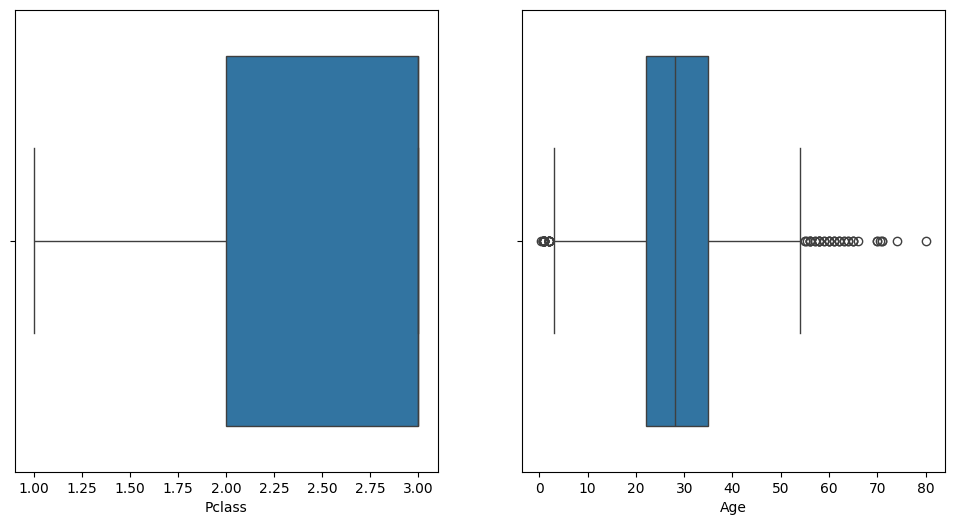

In [23]:
plt.figure(figsize=(12,6))
for i,col in enumerate(numrical_col):
  plt.subplot(1,2,i+1)
  sns.boxplot(df[col],orient="h")
plt.tight_layout()
plt.show()

built IQR from scratch

In [25]:
for col in numrical_col:
    # حساب الربع الأول والثالث
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # الحدود
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # تحديد القيم الشاذة
    lower_outliers = df[df[col] < lower_bound][col]
    upper_outliers = df[df[col] > upper_bound][col]

    # استبدال القيم الشاذة بالحدود
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound


/tmp/ipython-input-1355830449.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound


ValueError: num must be an integer with 1 <= num <= 2, not 3

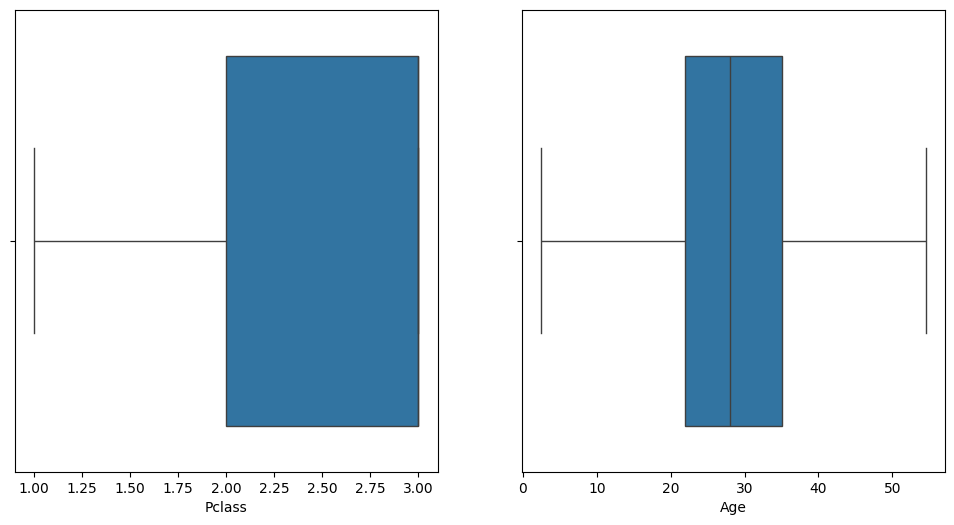

In [26]:
plt.figure(figsize=(12,6))
for i,col in enumerate(numrical_col):
  plt.subplot(1,2,i+1)
  sns.boxplot(df[col],orient="h")
plt.tight_layout()
plt.show()

check dublicated

In [27]:
df.duplicated().sum()

np.int64(129)

In [28]:
df.drop_duplicates(inplace=True)

Visualization

histogram


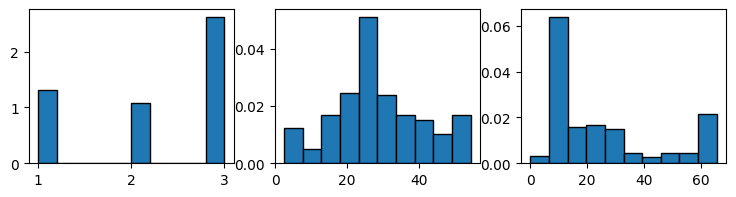

In [30]:
numrical_col=df.select_dtypes(include=["int64","float64"]).columns
plt.figure(figsize=(9,2))
for i,col in enumerate(numrical_col):
  plt.subplot(1,len(numrical_col),i+1)
  plt.hist(df[col],density=True,edgecolor="black")


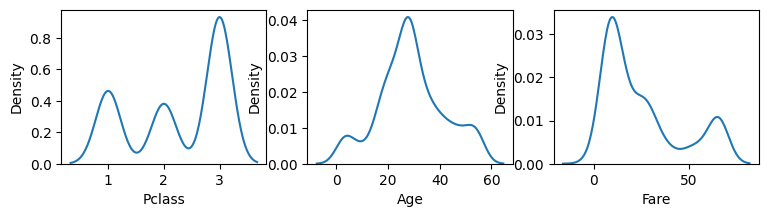

In [38]:
numrical_col=df.select_dtypes(include=["int64","float64"]).columns
plt.figure(figsize=(9,2))
for i,col in enumerate(numrical_col):
  plt.subplot(1,len(numrical_col),i+1)
  sns.kdeplot(df[col])

Data Splitting


Data splitting means dividing the columns of the dataset, into
Features & a Target.
➢ The Target is the column we are most interested to study, while
the Features are the columns that helps us understand more
about the Target.
➢ Usually the features are called “X”, while the Target is called “y”.
➢ In Titanic dataset, the target is the “Survived” column, while the
features are the other columns.




In [39]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [42]:
x



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,male,22.0,1,0,7.2500,S
1,1.0,female,38.0,1,0,65.6563,C
2,3.0,female,26.0,0,0,7.9250,S
3,1.0,female,35.0,1,0,53.1000,S
4,3.0,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3.0,female,39.0,0,5,29.1250,Q
887,1.0,female,19.0,0,0,30.0000,S
888,3.0,female,28.0,1,2,23.4500,S
889,1.0,male,26.0,0,0,30.0000,C


In [43]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
887,1
888,0
889,1


Normalization

Normalization is transforming the data so that all the numerical columns have the
same scale, that’s why normalization is also called Scaling.
➢ This scale is usually between 0 & 1, by applying a normalization technique
called MinMax Scaler.
➢ Steps to calculate MinMax Scaler for each column:
1. The 1st step is called fit:
➢ Calculate the Min & Max values of the column.
2. The 2nd step is called transform:
➢ The new values of the columns are calculated using this formula: (X
- Min) / (Max - Min), where X refers to the column’s values

In [45]:
from sklearn.preprocessing import MinMaxScaler
numrical_col=df.select_dtypes(include=["int64","float64"]).columns
scaler=MinMaxScaler()
scaler.fit(x[numrical_col])
x[numrical_col]=scaler.transform(x[numrical_col])


In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3.0,male,22.0,1,0,7.2500,S
1,1,1.0,female,38.0,1,0,65.6563,C
2,1,3.0,female,26.0,0,0,7.9250,S
3,1,1.0,female,35.0,1,0,53.1000,S
4,0,3.0,male,35.0,0,0,8.0500,S


Encoding

Encoding means representing the string values as numbers so that the
machine can understand them, where computers can only apply
mathematical operations over numbers.
➢ There are three main Encoding techniques to use, but to decide which
one to choose, we divide string values into 2 types:
➢ Nominal, where order of the unique values doesn’t matter, for
example, in shoes colour “Red” is not greater or less than “Yellow”.
➢ Ordinal, where order matters, for example, in shoes size “Large” is
greater than “Medium”.

Encoding Techniques are:
1. Ordinal Encoding:
➢ Used for ordinal columns.
2. One Hot Encoding:
➢ Used for nominal columns with small number of unique values.
3. Binary Encoding:
➢ Used for nominal columns with large number of unique values.
➢ In Titanic dataset, Sex & Embarked are both nominal so we will apply One Hot Encoding.

In [52]:
from category_encoders import OneHotEncoder
encoder=OneHotEncoder(cols=str_cols,drop_invariant=True)
x=encoder.fit_transform(x)

ModuleNotFoundError: No module named 'category_encoders'